## KNN for Classification using Scikit-learn
Example Implementation: 
    let us  build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
!pwd

/home/benjamin/ensembles/myenviro


In [3]:
#Load the dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('data/pima-indians-diabetes.csv',names=columns)

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [7]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

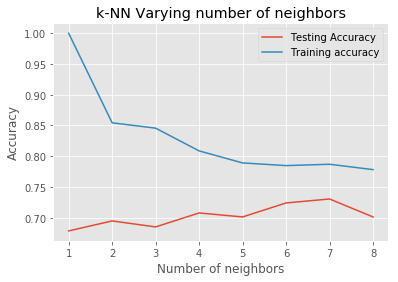

In [8]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [9]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [10]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
- weights -> distance
- kd_tree’ will use KDTree
- brute’ will use a brute-force search.
- euclidean_distance (l2) for p = 2
- metric_params : Additional keyword arguments for the metric function.


In [11]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)


0.7305194805194806

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [12]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [13]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

In [15]:
# Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


### Classification Report

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate 
Classification report using the classification_report method.

In [16]:
#import classification_report
from sklearn.metrics import classification_report

- Compute precision, recall, F-measure and support for each class

 - The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
     - The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

 - The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

 - The F-beta score is a measure of a test's accuracy: it can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

 - The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



## ROC (Reciever Operating Charecteristic) curve

- It is a plot of the true positive rate against the false positive rate for the different possible cutpoints (thresholds)  of a diagnostic test.

- ROC curves are typically used in binary classification to study the output of a classifier

- This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. 

- This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

- i.e. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

- The area under the curve is a measure of test accuracy.

Notes:
- Sensitivity = tpr
- Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g., 
    the percentage of healthy people who are correctly identified as not having the condition).

In [27]:
class_probabilities = knn.predict_proba(X_test)
pd.DataFrame(class_probabilities).head()

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.285714,0.714286
3,0.857143,0.142857
4,1.000000,0.000000


In [28]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [19]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

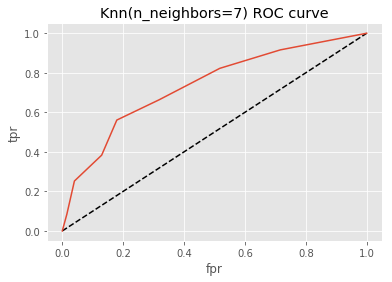

In [30]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [31]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

## One more time: Cross Validation

- The trained model's performance is dependent on way the data is split.
- It might not representative of the model’s ability to generalize.
- One solution is cross validation.
- We know we train  predictive models by partitioning the original sample into a training set to train the model, 
and a test set to evaluate it.

- In k-fold cross-validation, the original sample is randomly partitioned into **k** equal size subsamples. 
- Of the **k** subsamples, a single subsample is retained as the validation data for testing the model, 
 and the remaining k-1 subsamples are used as training data. 
    - The cross-validation process is then repeated *k* times (the folds), 
    with each of the *k* subsamples used exactly once as the validation data. 
    - The *k* results from the folds can then be averaged (or otherwise combined) to produce a single estimation. 
    - The advantage of this method is that all observations are used for both training and validation, 
    and each observation is used for validation exactly once.
    - (image from Wikipedia)

![kfcv](kfcv.jpg)


## Hyperparameter tuning: grid  or phase space search

- The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number 
of neighbors. 
- This is a kinda heuristic way  of hyperparameter tuning.

- Lets try something more rigurous:

 -  Trying a bunch of different hyperparameter values

 - Fitting all of them separately

 - Checking how well each performs

 - Choosing the best performing one

 -  Using cross-validation every time

Scikit-learn provides  *GridSearchCV* i.e Grid Search cross-validation

In [32]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

### In the case of a knn estimator  the parameter to be tuned is n_neighbors

In [33]:

param_grid = {'n_neighbors':np.arange(1,50)}- 

In [34]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
knn_cv.best_score_

0.7578125

In [36]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%